# 구매이력 데이터 클러스터링

## 0. 데이터 로드

In [2]:
import numpy as np
import pandas as pd
import datetime as datetime
import dataload
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
tqdm.pandas()

In [22]:
buy_full = pd.read_csv('../data/data.csv', encoding='cp949')

## 1. 데이터 정제

In [24]:
buy_full['date'] = buy_full['date'].apply(lambda x : pd.to_datetime(str(x), format='%Y%m%d'))

In [32]:
buy_full['year'] = buy_full['date'].apply(lambda x : x.year)
buy_2018 = buy_full[buy_full.year==2018][['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']]
buy_2019 = buy_full[buy_full.year==2019][['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']]
buy_2018.shape, buy_2019.shape

((1005487, 6), (1051412, 6))

### 1-1. 2018, 2019 데이터를 요일에 맞추기

In [33]:
buy_2018["date"] = buy_2018["date"] + datetime.timedelta(days=-1)
buy_2018['date'] = buy_2018["date"].apply(lambda x : x.replace(year=2018, month=12, day=31) if x==datetime.date(2017, 12, 31) else x)

### 1-2. 데이터 재구조화

In [34]:
buy_2018_cat = buy_2018.groupby(['date', 'big_cat', 'sm_cat']).sum('qty').reset_index()[['date', 'big_cat', 'sm_cat', 'qty']]
buy_2019_cat = buy_2019.groupby(['date', 'big_cat', 'sm_cat']).sum('qty').reset_index()[['date', 'big_cat', 'sm_cat', 'qty']]
buy_2018_cat["date"] = buy_2018_cat["date"].apply(lambda x : str(x)[5:10])
buy_2019_cat["date"] = buy_2019_cat["date"].apply(lambda x : str(x)[5:10])
buy_2018_ts = pd.pivot_table(buy_2018_cat, index=['big_cat', 'sm_cat'], columns="date", values="qty")
buy_2019_ts = pd.pivot_table(buy_2019_cat, index=['big_cat', 'sm_cat'], columns="date", values="qty")
buy_2018_ts.shape, buy_2019_ts.shape

((383, 365), (383, 365))

In [35]:
buy_2018_ts.head()

date             01-01  01-02  01-03  01-04  01-05  01-06  01-07  01-08  \
big_cat sm_cat                                                            
냉난방가전   가스온수기      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        가열식 가습기   23.0   12.0   15.0   18.0   11.0   17.0   15.0   16.0   
        공기정화 용품  191.0  161.0  118.0  196.0   98.0  100.0  204.0  197.0   
        공기청정기    147.0  103.0   77.0  141.0   74.0   62.0  166.0   90.0   
        난방용 열풍기    NaN    NaN    1.0    1.0    1.0    NaN    1.0    2.0   

date             01-09  01-10  ...  12-22  12-23  12-24  12-25  12-26  12-27  \
big_cat sm_cat                 ...                                             
냉난방가전   가스온수기      NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
        가열식 가습기   16.0   15.0  ...   11.0   15.0   15.0   21.0   14.0   32.0   
        공기정화 용품  110.0  142.0  ...  178.0  168.0  130.0  172.0  135.0  130.0   
        공기청정기     96.0   78.0  ...  235.0  165.0   84.0  148.0   95.0  102.0   
        난방용 열풍기    1.0    2.0  ...    NaN    3.0    NaN    1.0    2.0    6.0   

date             12-28  12-29  12-30  12-31  
big_cat sm_cat                               
냉난방가전   가스온수기      NaN    NaN    NaN    NaN  
        가열식 가습기   15.0   23.0   16.0    7.0  
        공기정화 용품   61.0   80.0  150.0  120.0  
        공기청정기     84.0   88.0  289.0  106.0  
        난방용 열풍기    NaN    NaN    3.0    NaN  

[5 rows x 365 columns]

In [36]:
buy_2019_ts.head()

date             01-01  01-02  01-03  01-04  01-05  01-06  01-07  01-08  \
big_cat sm_cat                                                            
냉난방가전   가스온수기      NaN    1.0    NaN    NaN    NaN    NaN    1.0    NaN   
        가열식 가습기   26.0   27.0   27.0   20.0   12.0   17.0   18.0   21.0   
        공기정화 용품  116.0  160.0  144.0  142.0  114.0  111.0  177.0  169.0   
        공기청정기    138.0  159.0  113.0   93.0  102.0  114.0  165.0   86.0   
        난방용 열풍기    NaN    2.0    NaN    NaN    NaN    NaN    9.0    2.0   

date             01-09  01-10  ...  12-22  12-23  12-24  12-25  12-26  12-27  \
big_cat sm_cat                 ...                                             
냉난방가전   가스온수기      1.0    1.0  ...    NaN    NaN    NaN    NaN    NaN    1.0   
        가열식 가습기   27.0   15.0  ...   27.0   29.0   19.0   10.0   20.0   19.0   
        공기정화 용품  148.0  153.0  ...  155.0  200.0  245.0  182.0  171.0  148.0   
        공기청정기    156.0  198.0  ...   64.0  112.0  124.0  102.0  484.0   95.0   
        난방용 열풍기    1.0    NaN  ...    NaN    1.0    1.0    NaN    NaN    1.0   

date             12-28  12-29  12-30  12-31  
big_cat sm_cat                               
냉난방가전   가스온수기      NaN    NaN    NaN    NaN  
        가열식 가습기   14.0    7.0   18.0   15.0  
        공기정화 용품  136.0  105.0  196.0  211.0  
        공기청정기     55.0   85.0  135.0   78.0  
        난방용 열풍기    NaN    NaN    1.0    1.0  

[5 rows x 365 columns]

### 1-3. 결측치 처리

In [37]:
buy_2018_ts = buy_2018_ts.fillna(0)
buy_2019_ts = buy_2019_ts.fillna(0)

## 2. 시계열 클러스터링  
`식품` 대분류 데이터

In [38]:
buy_2018_food = buy_2018_ts.loc[('식품',)]
buy_2019_food = buy_2019_ts.loc[('식품',)]

### 2-1. 정규화

In [39]:
avg_lst = []; std_lst = []
for idx, row in tqdm(buy_2018_food.iterrows()):
    avg_lst.append(row.mean())
    std_lst.append(row.std())

0it [00:00, ?it/s]

In [42]:
buy_2018_food['avg'] = avg_lst
buy_2018_food['std'] = std_lst
buy_2018_food.head()

date,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,avg,std
sm_cat,,,,,,,,,,,,,,,,,,,,,
가공란,132.0,113.0,102.0,89.0,64.0,77.0,95.0,139.0,148.0,114.0,...,100.0,463.0,229.0,346.0,99.0,127.0,221.0,90.0,217.934247,97.874000
가자미,16.0,17.0,12.0,24.0,7.0,21.0,56.0,20.0,22.0,22.0,...,16.0,26.0,20.0,53.0,18.0,20.0,33.0,21.0,30.589041,20.739512
갈비/찜/바비큐용 돈육,7.0,5.0,13.0,9.0,12.0,6.0,9.0,20.0,15.0,13.0,...,21.0,24.0,12.0,12.0,22.0,20.0,17.0,22.0,22.435616,11.044582
갈비용 우육,2.0,2.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,15.0,...,12.0,11.0,15.0,11.0,11.0,14.0,9.0,2.0,13.813699,6.569437
갈치,86.0,358.0,77.0,62.0,64.0,134.0,86.0,71.0,339.0,115.0,...,120.0,81.0,73.0,95.0,202.0,40.0,48.0,43.0,108.594521,136.483767


In [43]:
for i in tqdm(range(len(buy_2018_food))):
    for j in range(365):
        buy_2018_food.iloc[i,j] = (buy_2018_food.iloc[i,j] - buy_2018_food.iloc[i,365])/buy_2018_food.iloc[i,366]

  0%|          | 0/212 [00:00<?, ?it/s]

In [44]:
buy_2018_food = buy_2018_food.drop(['avg','std'], axis=1)

In [40]:
avg_lst = []; std_lst = []
for idx, row in tqdm(buy_2019_food.iterrows()):
    avg_lst.append(row.mean())
    std_lst.append(row.std())

0it [00:00, ?it/s]

In [45]:
buy_2019_food['avg'] = avg_lst
buy_2019_food['std'] = std_lst
buy_2019_food.head()

date,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,avg,std
sm_cat,,,,,,,,,,,,,,,,,,,,,
가공란,262.0,288.0,215.0,167.0,231.0,251.0,330.0,329.0,352.0,257.0,...,182.0,170.0,281.0,178.0,129.0,149.0,186.0,212.0,217.934247,97.874000
가자미,22.0,35.0,28.0,42.0,24.0,26.0,30.0,36.0,53.0,63.0,...,15.0,34.0,24.0,39.0,49.0,27.0,29.0,57.0,30.589041,20.739512
갈비/찜/바비큐용 돈육,23.0,17.0,13.0,9.0,21.0,14.0,18.0,14.0,19.0,14.0,...,30.0,32.0,26.0,15.0,34.0,25.0,35.0,37.0,22.435616,11.044582
갈비용 우육,16.0,4.0,13.0,8.0,20.0,17.0,5.0,7.0,5.0,17.0,...,17.0,23.0,11.0,10.0,23.0,24.0,14.0,22.0,13.813699,6.569437
갈치,123.0,128.0,92.0,132.0,99.0,63.0,56.0,113.0,74.0,182.0,...,110.0,93.0,67.0,95.0,80.0,65.0,119.0,73.0,108.594521,136.483767


In [46]:
for i in tqdm(range(len(buy_2019_food))):
    for j in range(365):
        buy_2019_food.iloc[i,j] = (buy_2019_food.iloc[i,j] - buy_2019_food.iloc[i,365])/buy_2019_food.iloc[i,366]

  0%|          | 0/212 [00:00<?, ?it/s]

In [47]:
buy_2019_food = buy_2019_food.drop(['avg','std'], axis=1)

In [55]:
buy_3 = (buy_2018_food + buy_2019_food) / 2
buy_3.head()

date,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
sm_cat,,,,,,,,,,,,,,,,,,,,,
가공란,-0.213890,-0.178129,-0.607253,-0.918878,-0.719642,-0.551058,-0.055523,0.164147,0.327623,-0.331388,...,-1.005724,-0.367148,-0.786054,1.007068,0.378709,0.450229,-1.061919,-0.816706,-0.147478,-0.683882
가자미,-0.558790,-0.221270,-0.510573,0.116250,-0.727550,-0.341813,0.598421,-0.124836,0.333227,0.574312,...,-0.317705,-0.510573,-0.727550,-0.028402,-0.414139,0.743072,0.140358,-0.341813,0.019815,0.405552
갈비/찜/바비큐용 돈육,-0.673237,-1.035405,-0.854321,-1.216489,-0.537423,-1.125947,-0.809050,-0.492152,-0.492152,-0.809050,...,0.865980,0.141643,0.277456,0.503811,-0.311068,-0.809050,0.503811,0.005829,0.322727,0.639624
갈비용 우육,-0.732741,-1.646062,-1.037181,-1.341622,-0.580521,-0.732741,-1.646062,-1.417732,-1.646062,0.332799,...,1.398339,-0.732741,0.104469,0.485019,-0.123861,-0.504411,0.485019,0.789459,-0.352191,-0.276081
갈치,-0.030000,0.984773,-0.176538,-0.084952,-0.198518,-0.073961,-0.275450,-0.121586,0.717342,0.292383,...,0.332680,-0.429315,0.046932,-0.158220,-0.282777,-0.099605,0.237431,-0.410998,-0.183865,-0.370700


## 3. Time-series Clustering

In [52]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score

### DTW

#### 3-1. 최적 k

In [53]:
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(2, 7):
        ts_clustering = TimeSeriesKMeans(n_clusters=i, max_iter=param_max_iter, random_state=1234, metric = 'dtw')
        ts_clustering.fit(data)
        distortions.append(ts_clustering.inertia_)

    plt.plot(range(2, 7), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()

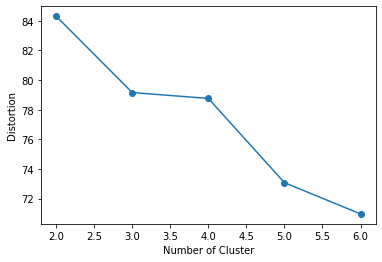

Wall time: 5min 1s


In [56]:
%%time
visualize_elbowmethod(buy_3)

최적 K 개수 : 5

#### 3-2. Clustering

In [59]:
%%time
model_dtw = TimeSeriesKMeans(n_clusters=5, init='random', n_init=10, max_iter=300, random_state=1234, metric = 'dtw').fit(buy_3)

Wall time: 9min 44s


In [60]:
result_dtw = model_dtw.predict(buy_3)
buy_3['cluster'] = result_dtw
buy_3.head()

C:\ProgramData\Anaconda3\envs\tensorflow2_py36\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 212 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


date,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,cluster
sm_cat,,,,,,,,,,,,,,,,,,,,,
가공란,-0.213890,-0.178129,-0.607253,-0.918878,-0.719642,-0.551058,-0.055523,0.164147,0.327623,-0.331388,...,-0.367148,-0.786054,1.007068,0.378709,0.450229,-1.061919,-0.816706,-0.147478,-0.683882,3
가자미,-0.558790,-0.221270,-0.510573,0.116250,-0.727550,-0.341813,0.598421,-0.124836,0.333227,0.574312,...,-0.510573,-0.727550,-0.028402,-0.414139,0.743072,0.140358,-0.341813,0.019815,0.405552,3
갈비/찜/바비큐용 돈육,-0.673237,-1.035405,-0.854321,-1.216489,-0.537423,-1.125947,-0.809050,-0.492152,-0.492152,-0.809050,...,0.141643,0.277456,0.503811,-0.311068,-0.809050,0.503811,0.005829,0.322727,0.639624,3
갈비용 우육,-0.732741,-1.646062,-1.037181,-1.341622,-0.580521,-0.732741,-1.646062,-1.417732,-1.646062,0.332799,...,-0.732741,0.104469,0.485019,-0.123861,-0.504411,0.485019,0.789459,-0.352191,-0.276081,3
갈치,-0.030000,0.984773,-0.176538,-0.084952,-0.198518,-0.073961,-0.275450,-0.121586,0.717342,0.292383,...,-0.429315,0.046932,-0.158220,-0.282777,-0.099605,0.237431,-0.410998,-0.183865,-0.370700,1


In [61]:
buy_3_dtw = buy_3.reset_index()
buy_3_dtw.head()

date,sm_cat,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,...,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,cluster
0,가공란,-0.213890,-0.178129,-0.607253,-0.918878,-0.719642,-0.551058,-0.055523,0.164147,0.327623,...,-0.367148,-0.786054,1.007068,0.378709,0.450229,-1.061919,-0.816706,-0.147478,-0.683882,3
1,가자미,-0.558790,-0.221270,-0.510573,0.116250,-0.727550,-0.341813,0.598421,-0.124836,0.333227,...,-0.510573,-0.727550,-0.028402,-0.414139,0.743072,0.140358,-0.341813,0.019815,0.405552,3
2,갈비/찜/바비큐용 돈육,-0.673237,-1.035405,-0.854321,-1.216489,-0.537423,-1.125947,-0.809050,-0.492152,-0.492152,...,0.141643,0.277456,0.503811,-0.311068,-0.809050,0.503811,0.005829,0.322727,0.639624,3
3,갈비용 우육,-0.732741,-1.646062,-1.037181,-1.341622,-0.580521,-0.732741,-1.646062,-1.417732,-1.646062,...,-0.732741,0.104469,0.485019,-0.123861,-0.504411,0.485019,0.789459,-0.352191,-0.276081,3
4,갈치,-0.030000,0.984773,-0.176538,-0.084952,-0.198518,-0.073961,-0.275450,-0.121586,0.717342,...,-0.429315,0.046932,-0.158220,-0.282777,-0.099605,0.237431,-0.410998,-0.183865,-0.370700,1


In [62]:
buy_3_dtw.to_csv('../data/food_tsclustering_norm.csv', encoding='CP949', index = False)
buy_3_dtw = pd.read_csv('../data/food_tsclustering_norm.csv', encoding='CP949')

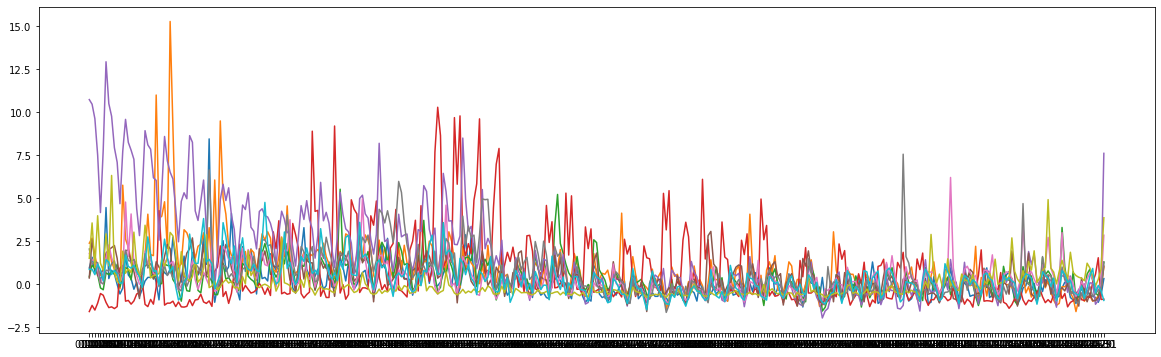

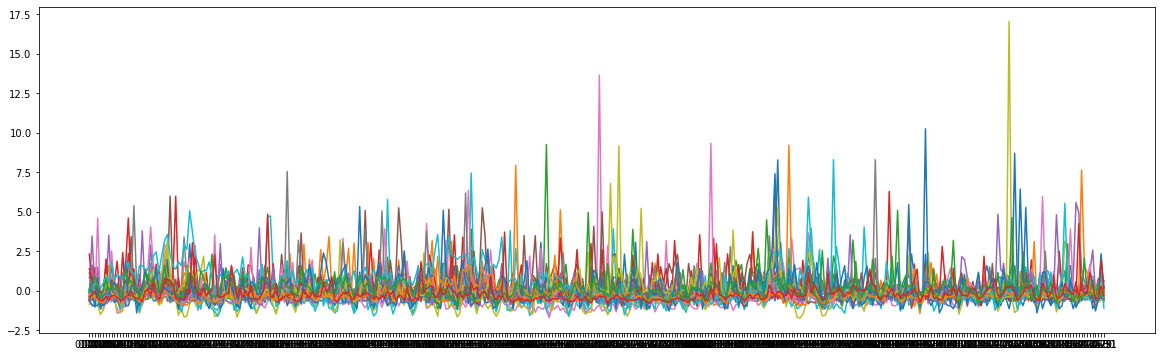

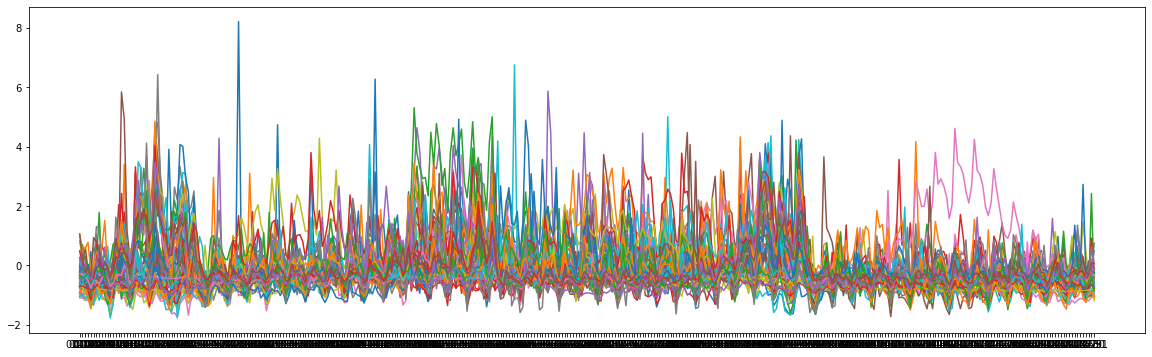

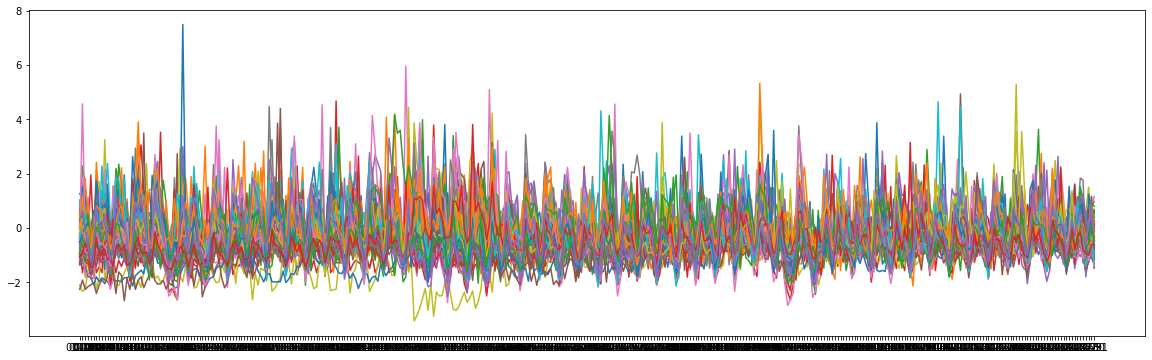

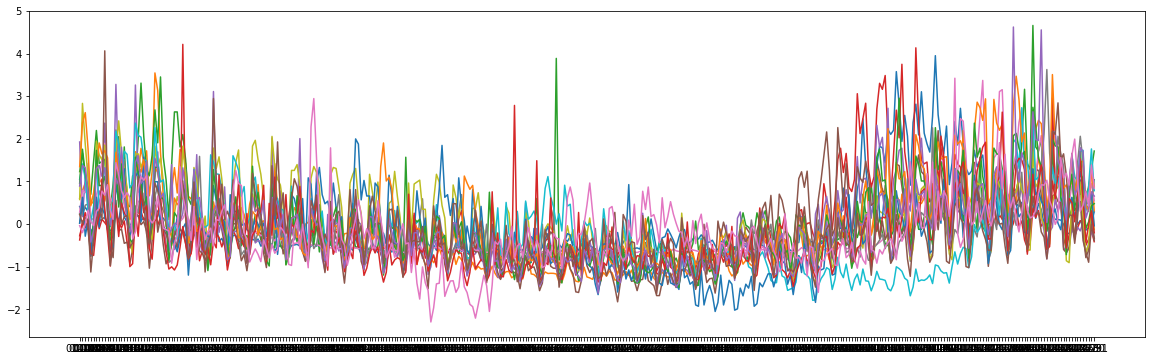

In [63]:
for i in range(5):
    clusters = buy_3_dtw.set_index('sm_cat')[buy_3_dtw.set_index('sm_cat')['cluster']==i]
    clusters.drop(['cluster'], axis=1, inplace=True)
    plt.figure(figsize=(20,6))
    plt.plot(clusters.T)
    plt.show

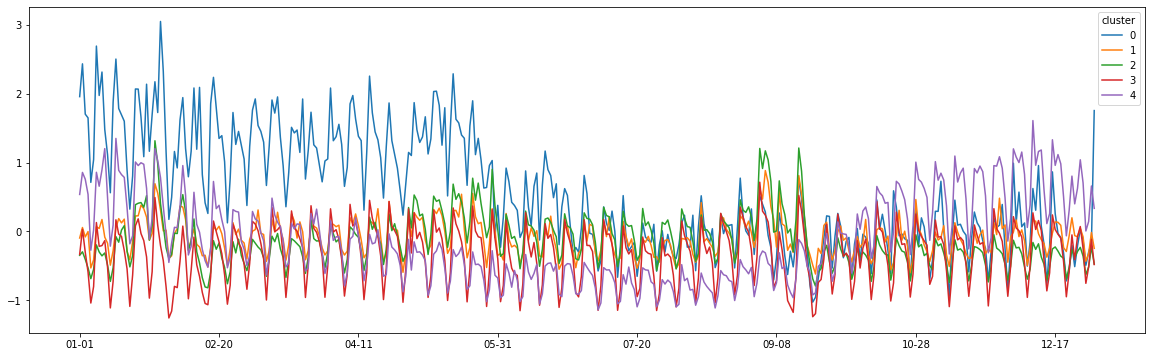

In [64]:
plt.rcParams["figure.figsize"]=(20,6)
buy_3_dtw.groupby(['cluster']).mean().T.plot()
plt.show()

In [65]:
pd.set_option('display.max_rows', 500)

In [66]:
print(buy_3_dtw[buy_3_dtw["cluster"]==0]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==0]["sm_cat"]

(10,)


28     견과류 마카다미아
31     견과류 카카오닙스
87         바나나우유
130          에이드
146       유제품 음료
153       잡곡 씨드류
159          전통차
168         초코우유
195         해초류 
196          허브차
Name: sm_cat, dtype: object

In [67]:
print(buy_3_dtw[buy_3_dtw["cluster"]==1]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==1]["sm_cat"]

(34,)


4              갈치
10            갓김치
14            건망고
17        건어물 노가리
20         건어물 쥐포
26            견과류
30       견과류 잣/은행
32        견과류 캐슈넛
33      견과류 피스타치오
40            과실차
43     과일채소 분말/분태
52      기타 한방/환제품
54             꽃게
56             낙지
71            랍스타
74           마/야콘
77          명태/동태
80             문어
89            반찬류
99             삼치
100          상황버섯
104           생선류
106      생식/선식 분말
113     스피루리나 영양제
121         양념 돈육
125       어란(생선알)
131       연어/훈제연어
140        옻/칡/쑥즙
157         전복 생물
158           전통주
178      클로렐라 영양제
183          파/양파
190     한방 분말/환제품
207            홍어
Name: sm_cat, dtype: object

In [68]:
print(buy_3_dtw[buy_3_dtw["cluster"]==2]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==2]["sm_cat"]

(56,)


9               감자
15            건바나나
19          건어물 멸치
22          건어물 황태
23             건자두
24             건포도
35              계란
39          곶감/반건시
41             과일류
42            과일세트
45       구이/수육용 돈육
48           굴비/조기
64            더치커피
65          도라지/더덕
72           레몬/자몽
78            무/배추
79             무김치
81             물김치
82             미나리
83       미숫가루/곡물가루
86     바나나/파인애플/망고
91            배추김치
108      소고기 등심/안심
110          수산 생물
111           수입우육
115         식혜/수정과
119           아이스티
122           양념우육
126         어린이 음료
135          오이/가지
137             옥돔
138            옥수수
148          음용 식초
149           이온음료
150       인삼/수삼/산삼
154             장어
160       절임배추/김치속
164         차 선물세트
166       참외/메론/수박
169          카페 푸드
179         키위/참다래
180            탄산수
181           탄산음료
182            토마토
185       포도/거봉/체리
186           표고버섯
192            한우육
193        해조류 다시마
199           혼합견과
200            혼합곡
201          홍삼 간식
202        홍삼 분말/환
203         

In [69]:
print(buy_3_dtw[buy_3_dtw["cluster"]==3]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==3]["sm_cat"]

(95,)


0                가공란
1                가자미
2       갈비/찜/바비큐용 돈육
3             갈비용 우육
7         감마리놀렌산 영양제
11               건강즙
12            건강즙/녹용
16           건어물 건새우
18         건어물 마른오징어
21           건어물 진미채
25               게장류
27            견과류 땅콩
34            견과류 호두
36               고등어
37        고추/피망/파프리카
44          과채 음료/주스
46            국내산 돈육
49     글루코사민/키토산 영양제
50            기타 농산물
51            기타 주스류
53               김치류
55                나물
57                녹차
58             느타리버섯
59           다이어트보조식
60      다이어트용 헬스보충식품
61             닭 양념육
62              닭가슴살
66             돼지 곱창
67                두유
70              딸기우유
73         루테인/눈 영양제
75             마늘/생강
76              메추리알
84             믹스 채소
85           밀크티/티라떼
88            반건조고구마
90          배/포도/과일즙
92               백김치
93               보리차
94        복분자/석류/과실즙
95                부추
96          브로콜리/셀러리
97               비타민
98        비타민/화이바 음료
101            새송이버섯
102            새우/대하
103          

In [70]:
print(buy_3_dtw[buy_3_dtw["cluster"]==4]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==4]["sm_cat"]

(17,)


5             감/홍시
6       감귤/한라봉/오렌지
8             감말랭이
13             건대추
29           견과류 밤
38             곡물차
47            굴 생물
63          대게/킹크랩
68            둥굴레차
69     딸기/복분자/블루베리
114            시금치
145            유자차
147            율무차
162             조개
175        코코아/핫초코
208             홍차
210              회
Name: sm_cat, dtype: object